# Bibliotecas

Importando bibliotecas:



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados

O [_dataset_](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016) utilizado nessa análise é proveniente do Kaggle e é composto por um conjunto de dados coletados das seguintes fontes:

[United Nations Development Program. (2018). Human development index - HDI.](http://hdr.undp.org/en/indicators/137506)

[World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016.](http://databank.worldbank.org/data/source/world-development-indicators#)

[Suicide in the Twenty-First Century (Szamil, 2017).](https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook)

[World Health Organization. (2018). Suicide prevention.](http://www.who.int/mental_health/suicide-prevention/en/)

Importando dataset:

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/amnacas/Portifolio/master/master.csv')

Observando o _dataset_:

In [11]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


# Informações do dados

Tamanho do _dataset_:

In [12]:
df.shape

(27820, 12)

O _dataset_ possui 27820 linhas e 12 colunas (atributos).

Observando as informações do _dataset_:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Existem 6 atributos que são _string_ (país, gênero, idade, país/ano, PIB/ano, geração), 4 atributos que são inteiros (ano, número de suicídios, população, PIB/capita) e 2 atributos _float_ (suicídios/100k habitantes e IDH).

Analisa-se quantos dados nulos há no _dataset_:

In [14]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Como pode-se ver, há dados nulos somente no atributo "PIB/ano($)", que representa a maioria dos dados deste atributo.

Quantidade de valores únicos por atributo:

In [15]:
df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

Mostra-se os valores únicos de cada atributo:

In [16]:
for col in df.columns:
  print(f'{col}:', df[col].sort_values().unique())

country: ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'

# Transformação dos dados

Para melhor leitura, altera-se o o nome dos atributos para português:

In [17]:
df.columns = ['pais', 'ano', 'genero', 'idade', 'suicidios', 'populacao', 'suicidios/100k_habitantes', 'pais/ano', 'IDH/ano', 'PIB/ano($)', 'PIB/capita($)', 'geracao']
df.head(20)

,pais,ano,genero,idade,suicidios,populacao,suicidios/100k_habitantes,pais/ano,IDH/ano,PIB/ano($),PIB/capita($),geracao
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


Como o atributo "PIB/ano" representa um valor inteiro em doláres, realiza-se a mudança do tipo do atributo de _string_ para inteiro:

In [18]:
df['PIB/ano($)'] = df['PIB/ano($)'].str.replace(',', '').astype(int)
df

,pais,ano,genero,idade,suicidios,populacao,suicidios/100k_habitantes,pais/ano,IDH/ano,PIB/ano($),PIB/capita($),geracao
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


Informações estatísticas dos atributos numéricos do _dataset_:

In [19]:
df.describe()

,ano,suicidios,populacao,suicidios/100k_habitantes,IDH/ano,PIB/ano($),PIB/capita($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


# Descrição do Conjunto de Dados


*   Países estudados
  *  101 paises foram abordados

*   Anos em que ocorreram os casos
  * 1987 a 2016

*   Gêneros considerados nos registros
  * Masculino
  * Feminino

*   Faixa Etária 
  *  5-14 anos
  *  15-24 anos
  *  25-34 anos
  *  35-54 anos
  *  55-74 anos
  *  75+ anos
  
*   Suicídios - Numero de casos registrados

*   População - População para o grupo

*   Suicídios/100k_habitantes - Números de suicídios a cada 100 mil habitantes
*   País/ano - Indentificador de país e ano
*   IDH - Índice de Desenvolvimento Humano para o ano
*   PIB/ano(\$) - Produto Interno Bruto por ano em doláres
*   PIB/capita(\$) - Produto Interno Bruto per capita (dividido pela população) em doláres

__***GERAÇÕES***__:

**Geração G.I.:**

Esta geração experimentou grande parte de sua juventude durante a rápida inovação tecnológica (rádio, telefone) em meio a níveis crescentes de desigualdade de renda mundial e uma economia em expansão. Depois que o mercado de ações quebrou, esta geração experimentou profunda turbulência econômica e social e, eventualmente, a Segunda Guerra Mundial.

**Geração Silent:**

A Geração Silenciosa são os filhos da Grande Depressão, cujos pais, depois de se deleitarem com o auge dos anos 20, agora enfrentavam grandes dificuldades econômicas e lutavam para sustentar suas famílias. Antes de chegar à adolescência, eles compartilharam com seus pais os horrores da Segunda Guerra Mundial, mas através dos olhos das crianças. Muitos perderam seus pais ou irmãos mais velhos que foram mortos na guerra. Eles viram a queda do nazismo e a devastação catastrófica da bomba nuclear.

Ao contrário da geração anterior, que lutou por “mudar o sistema”, a Geração Silenciosa tratava de “trabalhar dentro do sistema”. Eles fizeram isso mantendo a cabeça baixa e trabalhando duro, ganhando assim o rótulo de “silencioso”. Suas atitudes tendiam a não assumir riscos e jogar pelo seguro.

**Geração Baby Bommers:**

São fruto de uma explosão populacional ocorrida logo após o fim da Segunda Guerra Mundial, quando os combatentes, finalmente puderam voltar para suas casas e constituir uma família. No Brasil, esses anos coincidem com o desenvolvimentismo, quando Juscelino Kubitschek prometia “50 anos em 5” e a Tropicália movimentava o cenário cultural brasileiro. O país vivia uma fase de otimismo! Segundo estudos, trata-se de uma geração idealista, combativa, disciplinada e com espírito coletivo, responsável por iniciar as lutas por direitos civis e políticos.

**Geração X:**

A geração X, que hoje tem entre 36 e 55 anos de idade, cresceu no período de Guerra Fria e foi a primeira a experimentar os avanços tecnológicos. Valorizam o trabalho e estabilidade financeira. São independentes e empreendedores. Pessoas que buscam por seus direitos, procuram liberdade e tem ruptura com as regras e valores da geração anterior.

Essas pessoas ainda guardam muitas das características dos Baby Boomers, como a busca pela estabilidade na carreira, a disciplina e o respeito pela hierarquia. Mas eles também reforçam a ideia de liberdade de serem e curtirem o que quiserem.

**Geração Y (Millenials):**

Nascida entre 1985 e 1995 e atualmente com 25 a 35 anos, a Geração Y (os millennials) nasceu com a informática e a globalização e, com esses fenômenos, transformou o mundo. Esse grupo viu a internet nascer, o mundo se tornar mais veloz e a informação circular rapidamente em questão de segundos.

Porém, eles também são caracterizados como imediatistas. Já que viram o mundo acelerar, eles querem ter o que desejam o mais rápido possível — seja o sucesso na carreira, seja uma mensagem no celular. Com isso, também aumentam os níveis de medo e ansiedade dessa geração, que enfrenta sérios problemas psicológicos.

**Geração Z:**

Nascida entre 1995 e 2010, atualmente com 10 a 25 anos, a Geração Z já nasceu em um mundo conectado e cresceu com um celular na mão por isso também são chamados de “nativos digitais”. Para eles, não existe divisão entre online e offline, já que estão conectados a todo momento, em todo lugar.

Eles são extremamente ágeis, multitarefas e capazes de absorver uma grande quantidade de informações afinal, vivem na era do big data, da explosão de dados e precisam saber como lidar com eles. Se a Geração Y já se preocupa com as questões ambientais e sociais, a Geração Z vai além e transforma a preocupação em ativismo.

Referência: [Quais são as gerações? Entenda as características comportamentais](https://www.siteware.com.br/gestao-estrategica/quais-sao-as-geracoes/)

# Gráficos

## Mundo

Para avaliar os dados, adota-se o agrupamento por país, ano, gênero e geração pelo método de média dos atributos 'populacao', 'suicidios/100k_habitantes', 'suicidios', 'PIB/ano(\$)' e 'PIB/capita(\$)'.

### Por país

In [20]:
mundo_casos_por_pais = df[['pais', 'populacao', 'suicidios/100k_habitantes', 'suicidios', 'PIB/ano($)', 'PIB/capita($)']]
mundo_casos_por_pais = mundo_casos_por_pais.groupby('pais').mean()
mundo_maior_taxa_pais = mundo_casos_por_pais.sort_values('suicidios/100k_habitantes', ascending=False).head(10)
mundo_maior_quantidade_pais = mundo_casos_por_pais.sort_values('suicidios', ascending=False).head(10)

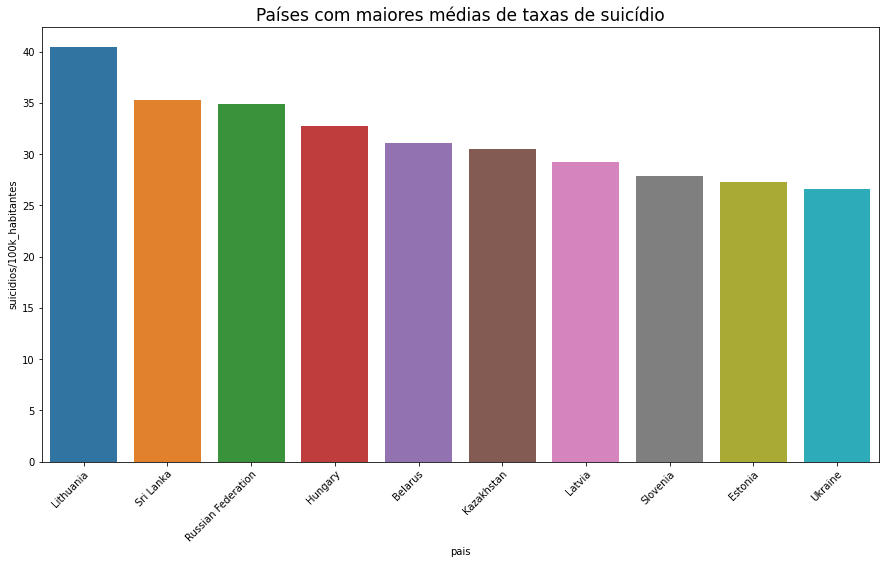

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(data=mundo_maior_taxa_pais, x=mundo_maior_taxa_pais.index, y='suicidios/100k_habitantes')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Países com maiores médias de taxas de suicídio', size=17)
plt.show()

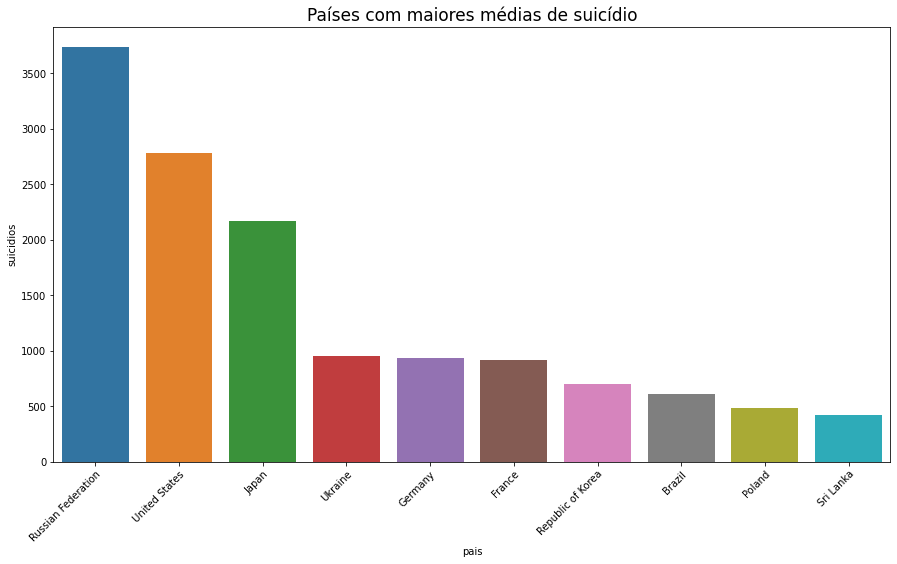

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(data=mundo_maior_quantidade_pais, x=mundo_maior_quantidade_pais.index, y='suicidios')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Países com maiores médias de suicídio', size=17)
plt.show()

### Por ano

In [23]:
mundo_casos_por_ano = df[['ano', 'populacao', 'suicidios/100k_habitantes', 'suicidios', 'PIB/ano($)', 'PIB/capita($)']]
mundo_casos_por_ano = mundo_casos_por_ano.groupby('ano').mean()
mundo_maior_taxa_ano = mundo_casos_por_ano.sort_values('suicidios/100k_habitantes', ascending=False).head(10)
mundo_maior_quantidade_ano = mundo_casos_por_ano.sort_values('suicidios', ascending=False).head(10)

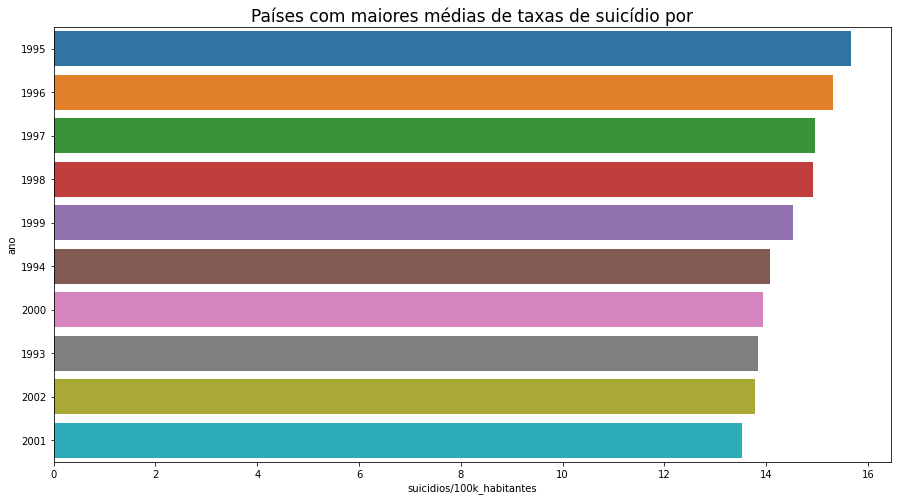

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(data=mundo_maior_taxa_ano, y=mundo_maior_taxa_ano.index.astype(str), x='suicidios/100k_habitantes')
plt.title('Países com maiores médias de taxas de suicídio por', size=17)
plt.show()

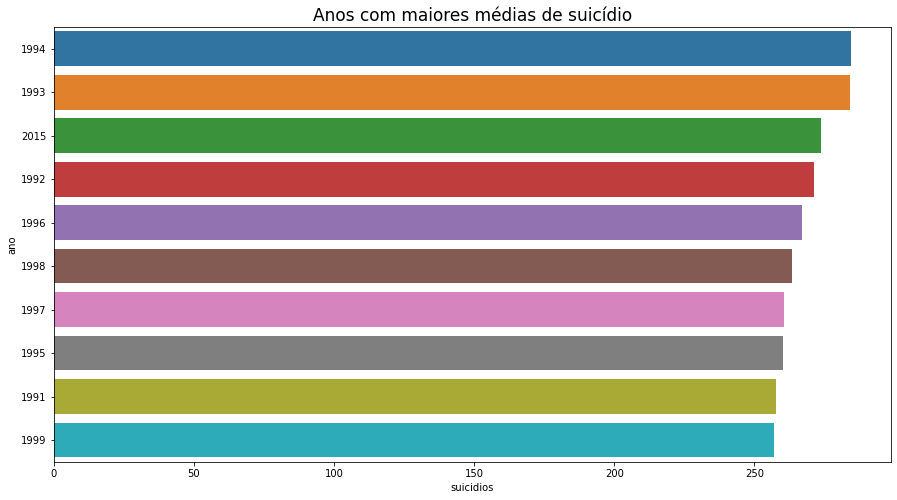

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(data=mundo_maior_quantidade_ano, x='suicidios', y=mundo_maior_quantidade_ano.index.astype(str))
plt.title('Anos com maiores médias de suicídio', size=17)
plt.show()

### Por geração

In [26]:
mundo_casos_por_geracao = df[['geracao', 'populacao', 'suicidios/100k_habitantes', 'suicidios', 'PIB/ano($)', 'PIB/capita($)']]
mundo_casos_por_geracao = mundo_casos_por_geracao.groupby('geracao').mean()
mundo_maior_taxa_geracao = mundo_casos_por_geracao.sort_values('suicidios/100k_habitantes', ascending=False).head(10)
mundo_maior_quantidade_geracao = mundo_casos_por_geracao.sort_values('suicidios', ascending=False).head(10)

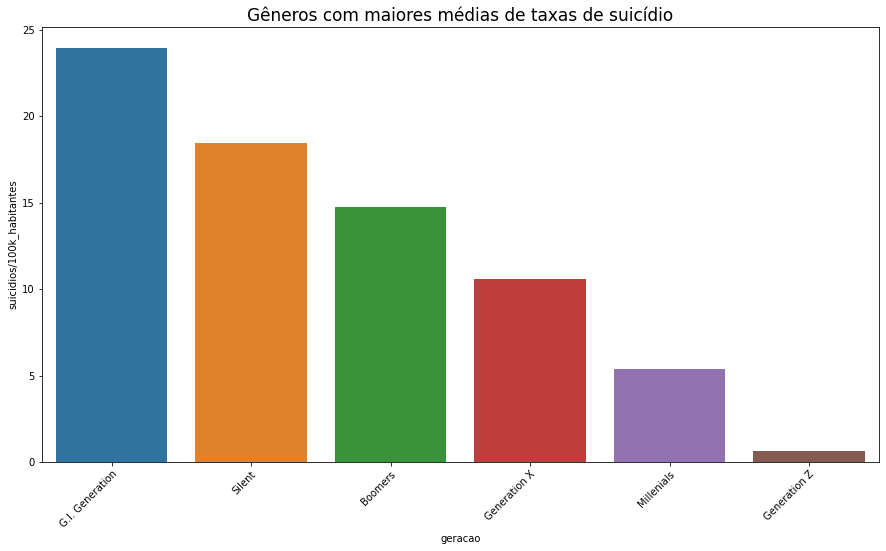

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(data=mundo_maior_taxa_geracao, x=mundo_maior_taxa_geracao.index, y='suicidios/100k_habitantes')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Gêneros com maiores médias de taxas de suicídio', size=17)
plt.show()

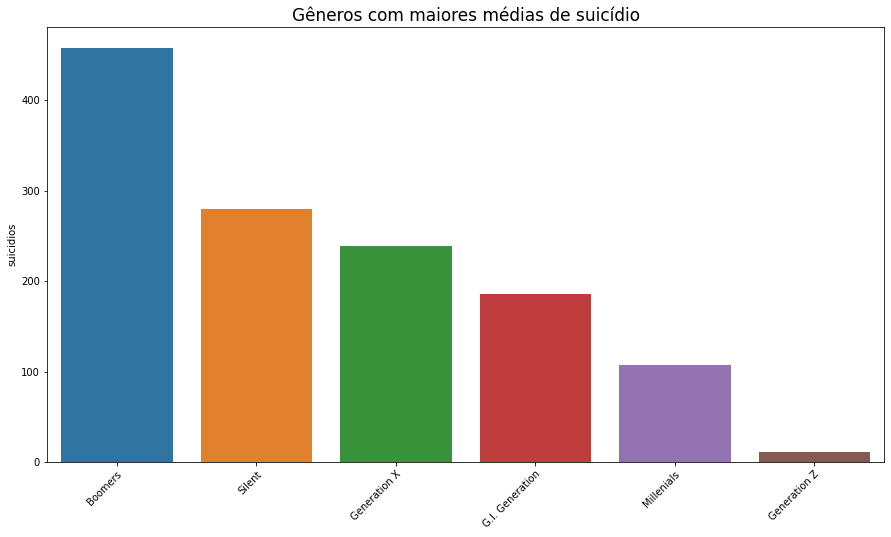

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=mundo_maior_quantidade_geracao, x=mundo_maior_quantidade_geracao.index.to_list(), y='suicidios')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Gêneros com maiores médias de suicídio', size=17)
plt.show()

### Por gênero

In [29]:
mundo_casos_por_genero = df[['genero', 'populacao', 'suicidios/100k_habitantes', 'suicidios', 'PIB/ano($)', 'PIB/capita($)']]
mundo_casos_por_genero = mundo_casos_por_genero.groupby('genero').mean()
mundo_maior_taxa_genero = mundo_casos_por_genero.sort_values('suicidios/100k_habitantes', ascending=False).head(10)
mundo_maior_quantidade_genero = mundo_casos_por_genero.sort_values('suicidios', ascending=False).head(10)

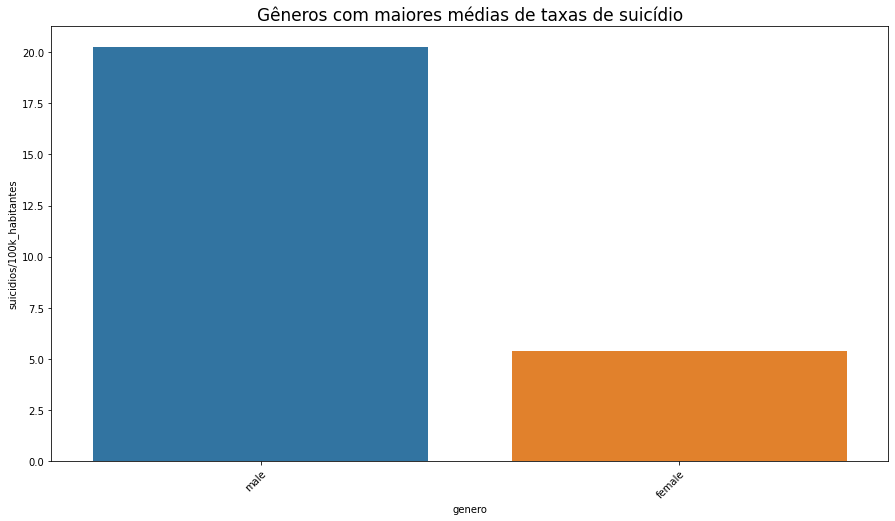

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(data=mundo_maior_taxa_genero, x=mundo_maior_taxa_genero.index, y='suicidios/100k_habitantes')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Gêneros com maiores médias de taxas de suicídio', size=17)
plt.show()

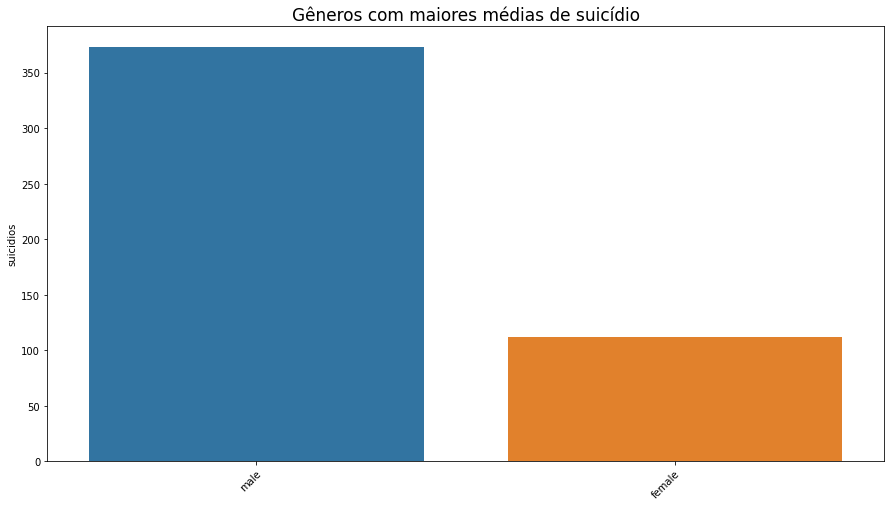

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=mundo_maior_quantidade_genero, x=mundo_maior_quantidade_genero.index.to_list(), y='suicidios')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Gêneros com maiores médias de suicídio', size=17)
plt.show()

Pode-se ver que tanto na quantidade como na taxa, os homens possuem maior tendência em se suicidar.

## Brasil

Cria-se um novo _dataframe_, somente com os valores referentes ao Brasil:

In [32]:
df_brasil = df[df.pais == "Brazil"].copy().reset_index(drop=True).drop(['pais', 'pais/ano'], axis=1) # usa-se .copy() pois caso não use, uma mudança no dataframe original resulta em uma mudança na cópia e vice-versa
df_brasil

,ano,genero,idade,suicidios,populacao,suicidios/100k_habitantes,IDH/ano,PIB/ano($),PIB/capita($),geracao
0,1985,male,75+ years,129,840300,15.35,0.576,222942790435,1898,G.I. Generation
1,1985,male,55-74 years,535,5364900,9.97,0.576,222942790435,1898,G.I. Generation
2,1985,male,35-54 years,1011,11986300,8.43,0.576,222942790435,1898,Silent
3,1985,male,25-34 years,791,10762900,7.35,0.576,222942790435,1898,Boomers
4,1985,male,15-24 years,661,13834000,4.78,0.576,222942790435,1898,Generation X
...,...,...,...,...,...,...,...,...,...,...
367,2015,female,25-34 years,466,17546090,2.66,NaN,1802214373741,9431,Millenials
368,2015,female,75+ years,89,3802086,2.34,NaN,1802214373741,9431,Silent
369,2015,female,15-24 years,397,17047218,2.33,NaN,1802214373741,9431,Millenials
370,2015,male,5-14 years,79,16057040,0.49,NaN,1802214373741,9431,Generation Z


### Por geração

In [33]:
brasil_casos_por_geracao = df_brasil[['geracao', 'populacao', 'suicidios/100k_habitantes', 'suicidios', 'PIB/ano($)', 'PIB/capita($)']]
brasil_casos_por_geracao = brasil_casos_por_geracao.groupby('geracao').mean()
brasil_maior_taxa_geracao = brasil_casos_por_geracao.sort_values('suicidios/100k_habitantes', ascending=False).head(10)
brasil_maior_quantidade_geracao = brasil_casos_por_geracao.sort_values('suicidios', ascending=False).head(10)

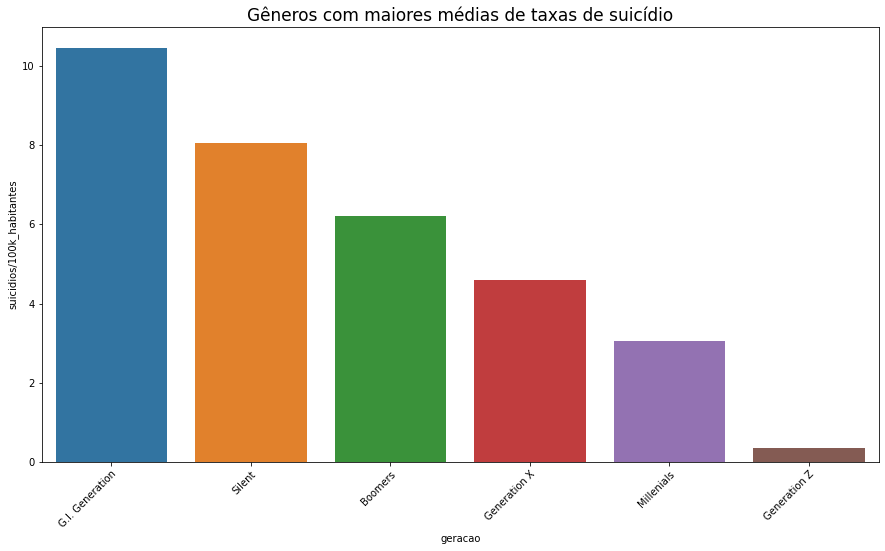

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(data=brasil_maior_taxa_geracao, x=brasil_maior_taxa_geracao.index, y='suicidios/100k_habitantes')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Gêneros com maiores médias de taxas de suicídio', size=17)
plt.show()

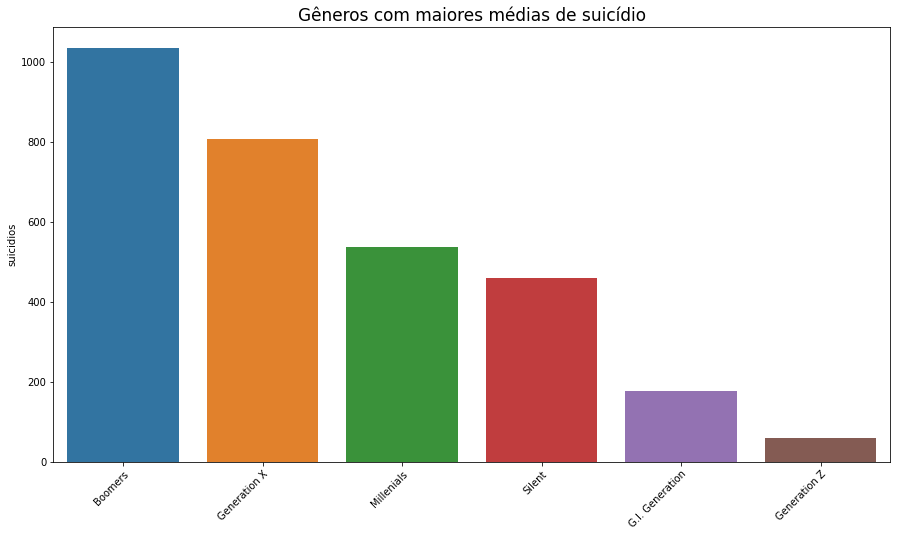

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(data=brasil_maior_quantidade_geracao, x=brasil_maior_quantidade_geracao.index.to_list(), y='suicidios')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Gêneros com maiores médias de suicídio', size=17)
plt.show()

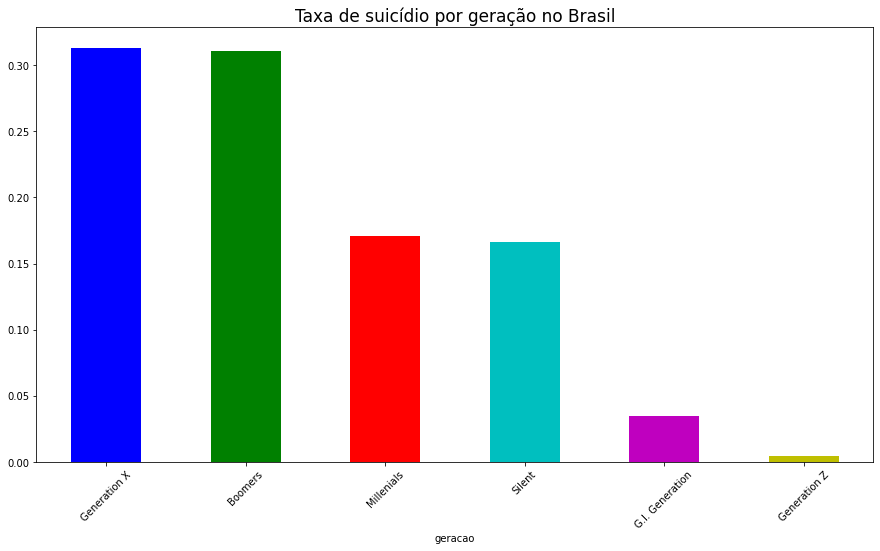

In [36]:
geracao_brasil = df_brasil.groupby('geracao').suicidios.sum() / df_brasil.groupby('geracao').suicidios.sum().sum()
plt.figure(figsize=(15,8))
ax = geracao_brasil.sort_values(ascending=False).plot(kind='bar',color = ['b', 'g', 'r', 'c', 'm', 'y'])
plt.title("Taxa de suicídio por geração no Brasil", size=17)
plt.xticks(rotation=45)
plt.show()

### Por ano

In [37]:
brasil_casos_por_ano = df_brasil[['ano', 'populacao', 'suicidios/100k_habitantes', 'suicidios', 'PIB/ano($)', 'PIB/capita($)']]
brasil_casos_por_ano = brasil_casos_por_ano.groupby('ano').mean()
brasil_maior_taxa_ano = brasil_casos_por_ano.sort_values('suicidios/100k_habitantes', ascending=False).head(10)
brasil_maior_quantidade_ano = brasil_casos_por_ano.sort_values('suicidios', ascending=False).head(10)

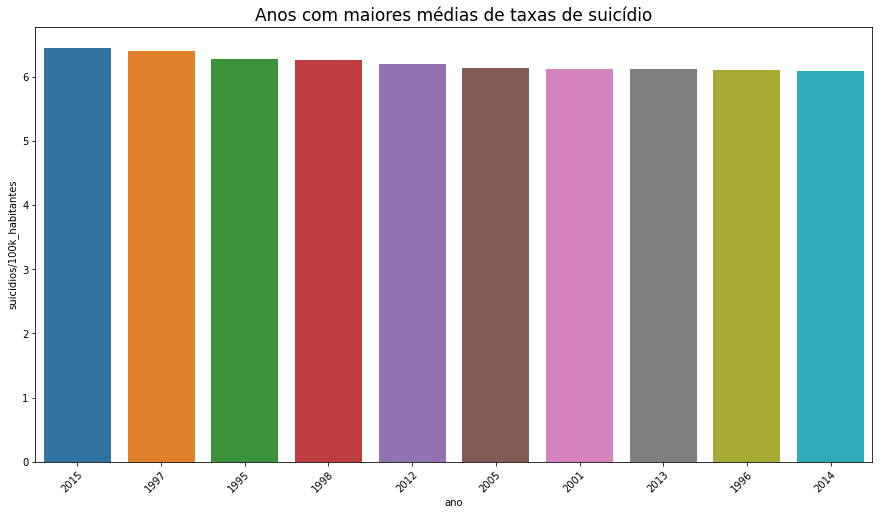

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(data=brasil_maior_taxa_ano, x=brasil_maior_taxa_ano.index.astype(str), y='suicidios/100k_habitantes')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Anos com maiores médias de taxas de suicídio', size=17)
plt.show()

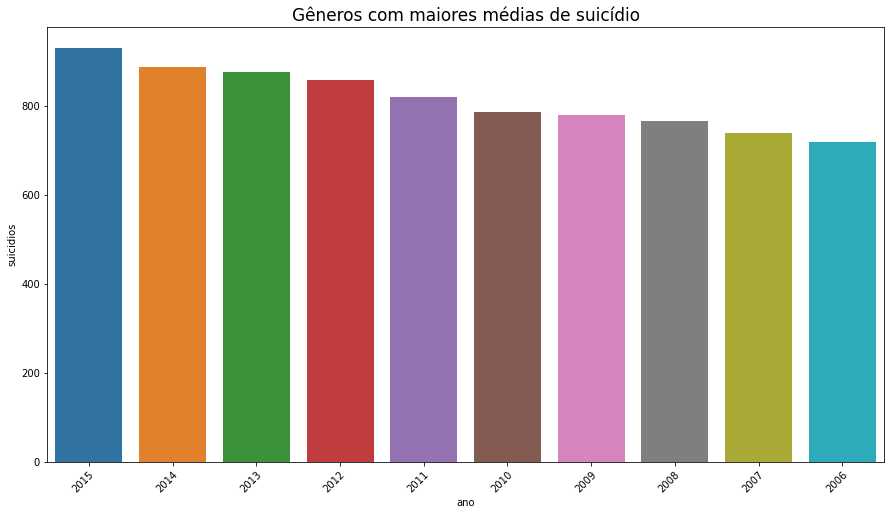

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(data=brasil_maior_quantidade_ano, x=brasil_maior_quantidade_ano.index.astype(str), y='suicidios')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Gêneros com maiores médias de suicídio', size=17)
plt.show()

### Por gênero

In [40]:
brasil_casos_por_genero = df_brasil[['genero', 'populacao', 'suicidios/100k_habitantes', 'suicidios', 'PIB/ano($)', 'PIB/capita($)']]
brasil_casos_por_genero = brasil_casos_por_genero.groupby('genero').mean()
brasil_maior_taxa_genero = brasil_casos_por_genero.sort_values('suicidios/100k_habitantes', ascending=False).head(10)
brasil_maior_quantidade_genero = brasil_casos_por_genero.sort_values('suicidios', ascending=False).head(10)

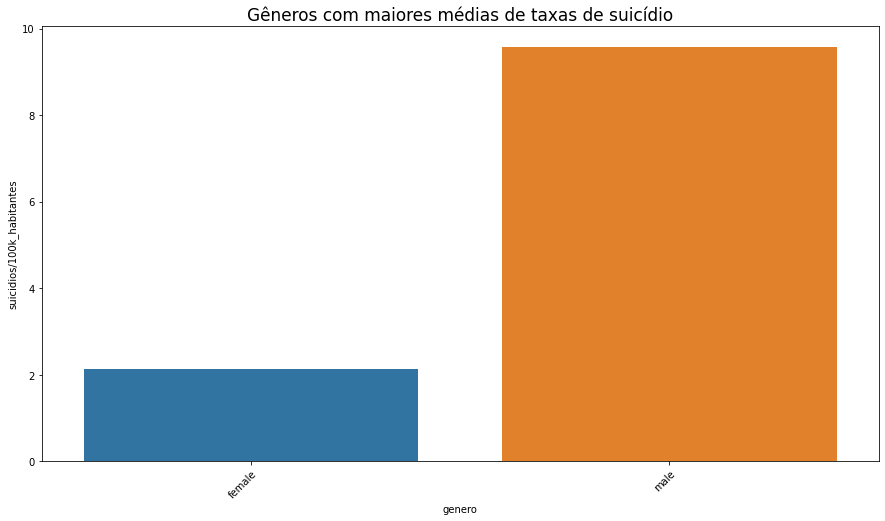

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(data=brasil_casos_por_genero, x=brasil_casos_por_genero.index.astype(str), y='suicidios/100k_habitantes')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Gêneros com maiores médias de taxas de suicídio', size=17)
plt.show()

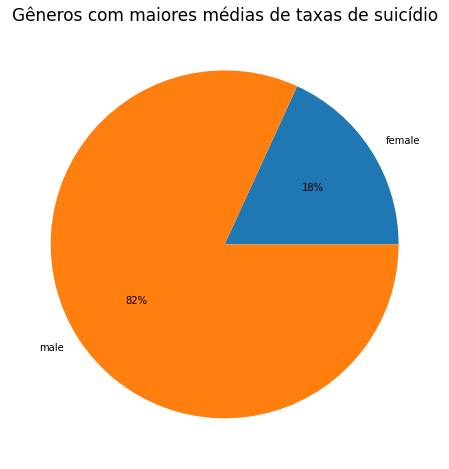

In [42]:
plt.figure(figsize=(15,8))
plt.pie(x=brasil_casos_por_genero['suicidios/100k_habitantes'], labels=brasil_casos_por_genero.index, autopct='%.0f%%')
# plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Gêneros com maiores médias de taxas de suicídio', size=17)
plt.show()

# Análises

**Mundo**:

- A Lituânia aparece como sendo o país com a maior média de taxa de suicídios (\~40 suicídios a cada 100k habitantes), enquanto que a Rússia aparece como sendo o país com maior média de casos (\~3500).

- Homens possuem a maior média de taxa e média de casos de suicídios do que as mulheres.

- Enquanto a geração "G.I. Generation" possui a maior média de taxa de suicídios, a geração "Boomers" é a que possui a maior média de casos de suicídios.

- Em relação a taxas, 1995 foi o ano que possuiu a maior média de taxa, enquanto em relação a quantidade, o ano de 1994 foi o que apresentou a maior média de casos.

**Brasil**:

- A "G.I. Generation" possui a maior média de taxa de suicídios e a "Boomers" a maior média de suicídios. Entretanto, observando a proporcionalidade das gerações, as gerações "Generation X" e "Boomers" correspondem a cerca de 60% dos casos totais do Brasil.

- 2015 foi o ano com a maior média de taxa e maior média de casos de suicídios.

- Assim como no mundo, os homens brasileiros tem a maior média de taxa e casos de suicídios do que as mulheres. Vale ressaltar que 82% dos casos de suicídios no Brasil são cometidos por homens.

**Questionamentos**:

1. Por que 1995 foi ano com os maiores índices de suícidio ? O que acontecia no mundo nesse ano ?
2. Por quais motivos os homens se suicidam mais ?
3. Existem fatores ecônomicos e sociais mais graves na Lituânia e na Rússia para serem os países com níveis de suicídio elevado ?
4. Se segundo os estudos, a geração "Boomers" trata de uma geração idealista, combativa, disciplinada e com espírito coletivo, responsável por iniciar as lutas por direitos civis e políticos, por que mesmo assim é a geração que possui cerca de 30% dos casos de suicídios no Brasil ? Pode-se pensar que para o caso da geração "Generation G.I.", muito provavelmete a guerra, a crise econômica e social foram os principais fatores para tais números de suicídios.